In [1]:
import numpy as np
import scipy.optimize as fitter
import matplotlib.pyplot as plt

# Experiment 1

### 1.2

In [2]:
minimum = np.array([3, 33, 745]) #lux, same as background readings
maximum = np.array([764, 8399, 169000]) #lux

comparedReadings = np.array([1785, 2120])#6000 -> 150,000


lightSrc = 11 #centimeters, very rough
offset = 5 #cm, offset of detecter from close side of base
dist = np.array([18.0, 31.0, 29.0, 27.0, 24.0])
illum = np.array([2170, 460, 650, 945, 1772])

### 1.3

In [3]:
detector = 36.1 #cm 
initialI = 84 #+/- 1 (originally 100 but we moved to the lower range)

illumination = [19, 22, 31, 44, 58, 68, 72, 69, 59, 46, 33, 22, 19, 23, 32, 
                45, 59, 69, 72, 69, 58, 46, 32, 22, 19, 22, 32, 44, 58, 68, 72]
angle = (np.arange(0,451,15) + 90) % 180

In [4]:
def f(x, a0, a1, a2):
    return a0*(np.cos(np.deg2rad(x) - a1))**2 + a2

par, cov = fitter.curve_fit(f,angle,illumination)
b0, b1, b2 = par

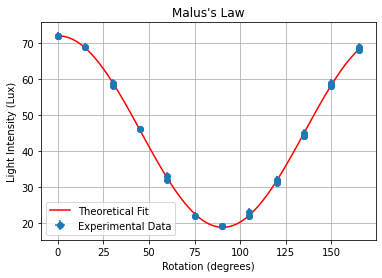

In [5]:
figure, ax = plt.subplots()
ax.errorbar(angle,illumination,xerr=1,yerr=1,fmt='o',label='Experimental Data')
x = np.linspace(min(angle),max(angle),100)
ax.plot(x,f(x,b0,b1,b2), c='r',label='Theoretical Fit')
ax.set_xlabel('Rotation (degrees)')
ax.set_ylabel('Light Intensity (Lux)')
ax.set_title("Malus's Law")
ax.grid()
ax.legend();
plt.savefig('Lab 2 Experiment 1.4.png', facecolor='w', format='png', bbox_inches='tight')

In [6]:
#Calculating reduced chi squared
res = np.array(illumination) - f(np.array(angle), b0, b1, b2)
chi_s = np.sum(res**2 / np.sqrt(2))
rChi_s = chi_s / (len(illumination) - 3)
rChi_s

0.184767852659318

# Experiment 2

### 2.1

In [7]:
initialI = 5939

### 2.2

In [8]:
initialI = 7200
straightTwo = 7238 #45degree offset for fast axis from linear polarizer

# Experiment 3

In [9]:
origin = np.array([232, 231, 232]) #angle of the glass that is perpendicular to laser
originLux = np.array([234, 242,237])#lux transmitted through glass that is perpendicular
gThickness = np.array([1.90,1.90]) #thickness of the glass that the laser is traveling through (cm)
gAngle = np.array([[221,221,219],[211,210,209],[199,199,195],[188,188,188],[178,178,177], [168,170,169]]) #angle of the glass
tLux = np.array([[243,244,230],[244,227,230],[234,230,236],[231,234,233],[165,160,165],[154,141,145]]) #transmitted Lux
dotDist = np.array([0.5,1,2,3,4.5,5.5]) #how far the laser travels horizontally across the grid paper 

In [10]:
def theta2F(y,t): #t = thickness of block, y = horizontal displacement
    t1 = np.sqrt(4*y*y + 4*t*t)
    return np.arcsin(2*y/t1) #returns in radians


def reflectance(theta1, theta2, n1, n2):
    t1 = n2*np.cos(theta1) - n1*np.cos(theta2)
    t2 = n2*np.cos(theta1) + n1*np.cos(theta2)
    return t1*t1 / (t2*t2)


#very bad code but I'm having trouble making curve_fit behave so...
def reflectanceFit(theta1, n2):
    global angle2, n1
    t1 = n2*np.cos(theta1) - n1*np.cos(angle2)
    t2 = n2*np.cos(theta1) + n1*np.cos(angle2)
    return t1*t1 / (t2*t2)

def snell(theta1, theta2, n1): #returns index of refraction using snell's law
    return n1*np.sin(theta1) / np.sin(theta2)

def snellTheta(theta1, n1, n2):
    return np.arcsin(n1/n2*np.sin(theta1))

In [11]:
rLux = originLux.mean() - tLux.mean(axis=1)#converting transmitted lux to reflected via R = 1 - T
angle1 = np.deg2rad(origin.mean() - gAngle.mean(axis=1))
angle2 = theta2F(dotDist, np.ones(len(dotDist))*gThickness.mean())
n1 = 1
par, cov = fitter.curve_fit(reflectanceFit, angle1, rLux/originLux.mean(), [1.4])
n2Fit = par[0]

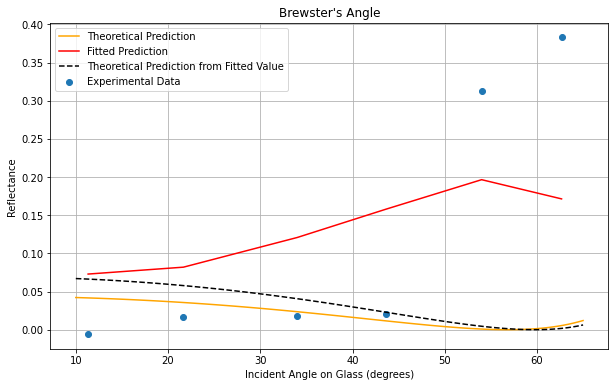

In [12]:
figure, ax = plt.subplots(figsize=(10,6))

x = np.linspace(10,65,100)

ax.scatter(origin.mean() - gAngle.mean(axis=1),rLux/originLux.mean(),label='Experimental Data')



n2 = 1.53
theta2 = np.arcsin(n1/n2*np.sin(np.deg2rad(x)))
y = reflectance(np.deg2rad(x), theta2, n1, n2)
ax.plot(x,y, c='orange', label='Theoretical Prediction')


ax.plot(np.rad2deg(angle1),reflectanceFit(angle1, n2Fit),c='red', label='Fitted Prediction')

out = reflectance(np.deg2rad(x), snellTheta(np.deg2rad(x),n1,n2Fit), n1, n2Fit);
x = x[np.isnan(out) != 1]
out = out[np.isnan(out) != 1]
ax.plot(x,out,c='black',linestyle='dashed',label='Theoretical Prediction from Fitted Value')

ax.set_title("Brewster's Angle")
ax.set_xlabel('Incident Angle on Glass (degrees)')
ax.set_ylabel('Reflectance')
ax.legend()
ax.grid()
plt.savefig('Lab 2 Experiment 3.png', facecolor='w', format='png', bbox_inches='tight')

In [13]:
n2Fit, np.rad2deg(np.arctan(n2Fit/n1)), np.rad2deg(np.arctan(n2/n1))

(1.7158472894569308, 59.76626301162385, 56.831579178740526)